# Import Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline
import numpy as np


# Read input files

In [3]:
df_cd = pd.read_csv("/Users/harish/Desktop/DS_codes/indigo/common_data.csv")
df_ay = pd.read_csv("/Users/harish/Desktop/DS_codes/indigo/annual_yields.csv")
df_do = pd.read_csv("/Users/harish/Desktop/DS_codes/indigo/daily_observations.csv")

# Data Preprocessing


In [4]:
df_cd['tot_yield']  = (df_cd['yield'])*(df_cd['area_harvested_obs'])
    

In [5]:
df_cd.head(5)

,adm2_code,adm1_code,year,yield,area_harvested_obs,phen_gup,phen_dor,tot_yield
0,US01031,US01,2003,123.0,5500.0,72,295,676500.0
1,US01031,US01,2004,111.0,6900.0,72,295,765900.0
2,US01031,US01,2005,127.0,6000.0,72,295,762000.0
3,US01031,US01,2006,85.0,5600.0,72,295,476000.0
4,US01031,US01,2007,73.0,8300.0,72,295,605900.0


# Distribution of Corn yield across US states

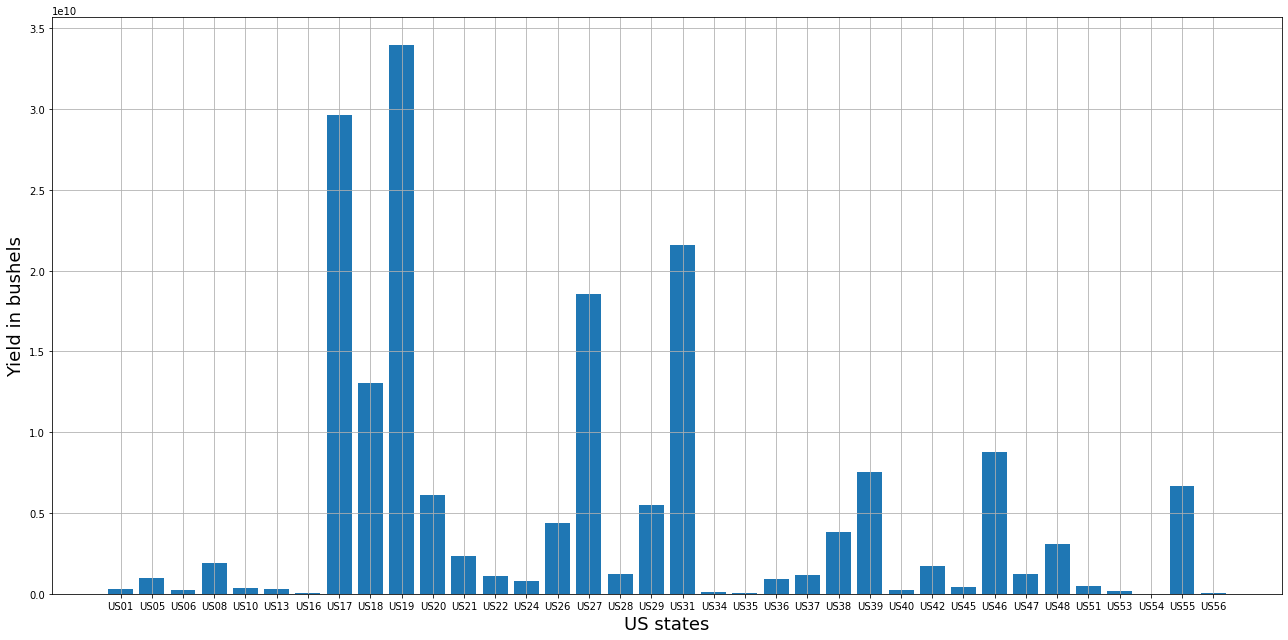

In [6]:
df_state_corn = df_cd.groupby('adm1_code',as_index=False ).agg({'tot_yield': 'sum'})

from matplotlib import pyplot

pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('US states',fontsize=18)
pyplot.ylabel('Yield in bushels',fontsize=18)
pyplot.bar(df_state_corn['adm1_code'], df_state_corn['tot_yield'], )
pyplot.tight_layout()
pyplot.show()


# Distribution of Corn yield across years

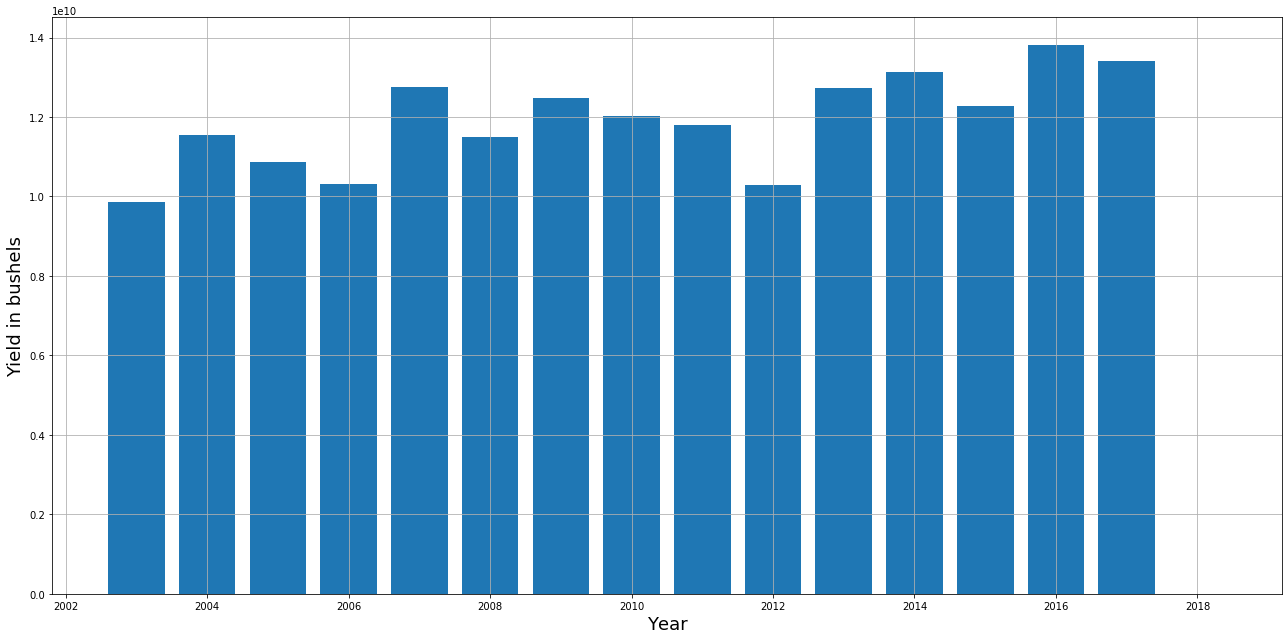

In [7]:
df_year_corn = df_cd.groupby('year',as_index=False ).agg({'tot_yield': 'sum'})

from matplotlib import pyplot

pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('Year',fontsize=18)
pyplot.ylabel('Yield in bushels',fontsize=18)
pyplot.bar(df_year_corn['year'], df_year_corn['tot_yield'] )
pyplot.tight_layout()
pyplot.show()


In [53]:
df_year_corn

,year,tot_yield
0,2003,9.858881e+09
1,2004,1.155270e+10
2,2005,1.087125e+10
3,2006,1.030671e+10
4,2007,1.275055e+10
5,2008,1.149284e+10
6,2009,1.247478e+10
7,2010,1.203569e+10
8,2011,1.179511e+10
9,2012,1.028928e+10


# Top US corn producing counties each year

In [8]:
df_highest_producer = df_cd.groupby(['year', 'adm2_code','adm1_code'], as_index=False).agg({'tot_yield': 'sum'}).sort_values(['tot_yield'],ascending=False)
df_highest_producer = df_highest_producer[df_highest_producer['tot_yield'] != 0]
df_highest_producer.groupby('year').head(1).sort_values('year')


,year,adm2_code,adm1_code,tot_yield
117,2003,US17113,US17,57985200.0
1344,2004,US17113,US17,61771500.0
2754,2005,US19109,US19,57187500.0
3795,2006,US17113,US17,61443200.0
5017,2007,US17113,US17,77224000.0
6282,2008,US17113,US17,69920000.0
7462,2009,US17113,US17,68541000.0
8650,2010,US17113,US17,60511500.0
9895,2011,US17099,US17,59838750.0
11297,2012,US19109,US19,52754300.0


# Exploring Observations data

In [9]:
df_do.head()

,adm2_code,year,date,doy,met_avg_t,met_extreme_cold,met_extreme_hot1,met_extreme_hot2,met_gdd,met_max_rh,...,mod_lst_day,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi
0,US01031,2003,2003-01-01,1,287.44855,0,0,0,4.298554,96.77753,...,288.11395,273.58743,0.08692,0.244635,0.03991,0.07201,0.30011,0.259010,0.162760,0.475683
1,US01031,2003,2003-01-02,2,286.61816,0,0,0,5.022919,87.06785,...,288.11395,273.58743,0.08596,0.245240,0.04046,0.07342,0.29704,0.259070,0.159570,0.480918
2,US01031,2003,2003-01-03,3,277.10223,1,0,0,0.000000,88.82168,...,288.11395,273.58743,0.08415,0.245300,0.03945,0.07473,0.29792,0.257964,0.154409,0.489149
3,US01031,2003,2003-01-04,4,276.73196,1,0,0,0.399628,80.37215,...,288.11395,273.58743,0.08143,0.247400,0.03815,0.07355,0.29815,0.257130,0.156588,0.504729
4,US01031,2003,2003-01-05,5,281.21307,1,0,0,3.454437,76.90567,...,288.11395,273.58743,0.08141,0.245780,0.03817,0.07355,0.29834,0.261379,0.157310,0.502369


In [10]:
df_do.shape

(6983910, 28)

# Aggregating observations at county and year level

In [11]:
df_do_agg = df_do.groupby(['adm2_code', 'year'], as_index=False).agg({
                                          "met_avg_t": "mean", 
                                          "met_extreme_cold": "sum", 
                                          "met_extreme_hot1": "sum", 
                                          "met_extreme_hot2": "sum",
                                          "met_gdd": "sum",
                                          "met_max_rh": "mean",
                                          "met_max_t": "mean",
                                          "met_max_vpd": "mean",
                                          "met_min_rh": "mean",
                                          "met_min_t": "mean",
                                          "met_p_mm": "mean",
                                          "met_sh": "mean",
                                          "met_sr_wm2": "mean",
                                          "mod_evi": "mean",
                                          "mod_lst_day": "mean",
                                          "mod_lst_night": "mean",                        
                                          "mod_nbar_1": "mean",
                                          "mod_nbar_2": "mean",
                                          "mod_nbar_3": "mean",
                                          "mod_nbar_4": "mean",
                                          "mod_nbar_5": "mean",
                                          "mod_nbar_6": "mean",
                                          "mod_nbar_7": "mean",
                                          "mod_ndvi": "mean"})


In [12]:
df_do_agg.head()

,adm2_code,year,met_avg_t,met_extreme_cold,met_extreme_hot1,met_extreme_hot2,met_gdd,met_max_rh,met_max_t,met_max_vpd,...,mod_lst_day,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi
0,US01031,2003,291.446763,45,0,105,3464.206752,94.184421,297.626227,0.131772,...,298.803654,284.917569,0.094530,0.318926,0.044129,0.087745,0.360954,0.290754,0.171229,0.537097
1,US01031,2004,291.569599,37,3,112,3484.853876,93.969739,297.899575,0.148727,...,299.133303,284.874979,0.092474,0.315844,0.043941,0.086288,0.356350,0.289552,0.169410,0.541999
2,US01031,2005,291.583636,38,1,129,3457.722264,94.242992,297.996766,0.155822,...,298.622260,285.186738,0.091726,0.314565,0.042958,0.084878,0.355302,0.285262,0.166464,0.539956
3,US01031,2006,292.253343,33,37,155,3554.026852,93.804784,299.494444,0.180722,...,301.355991,284.969136,0.102669,0.319451,0.048599,0.093401,0.361230,0.299292,0.190276,0.509969
4,US01031,2007,292.269954,35,29,149,3583.245157,91.662996,299.069181,0.247216,...,300.715538,285.218698,0.094963,0.311940,0.044385,0.086954,0.356378,0.291818,0.176689,0.529163


In [13]:
df_do_agg.shape

(19134, 26)

# Spliting dataset to train and test 

In [14]:
df_do_train  =  df_do_agg[(df_do_agg.year != 2018)] 
df_do_test   =  df_do_agg[(df_do_agg.year == 2018)] 

In [15]:
print(df_do_train.shape)
print(df_do_test.shape)

(17842, 26)
(1292, 26)


In [16]:
df_cd_train  =  df_cd[(df_cd.year != 2018)] 
df_cd_test   =  df_cd[(df_cd.year == 2018)] 

print(df_cd_train.shape)
print(df_cd_test.shape)

(17842, 8)
(1292, 8)


In [17]:
train_data = pd.merge(df_do_train, df_cd_train,  on=['adm2_code','year'])
test_data = pd.merge(df_do_test, df_cd_test, on = ['adm2_code','year'])


# Check for null values in train data

In [18]:
train_data.isnull().sum()

adm2_code             0
year                  0
met_avg_t             0
met_extreme_cold      0
met_extreme_hot1      0
met_extreme_hot2      0
met_gdd               0
met_max_rh            0
met_max_t             0
met_max_vpd           0
met_min_rh            0
met_min_t             0
met_p_mm              0
met_sh                0
met_sr_wm2            0
mod_evi               0
mod_lst_day           0
mod_lst_night         0
mod_nbar_1            0
mod_nbar_2            0
mod_nbar_3            0
mod_nbar_4            0
mod_nbar_5            0
mod_nbar_6            0
mod_nbar_7            0
mod_ndvi              0
adm1_code             0
yield                 0
area_harvested_obs    0
phen_gup              0
phen_dor              0
tot_yield             0
dtype: int64

# Correlation matrix and visualization

In [19]:
corr_df = train_data[['met_avg_t', 'met_extreme_cold',
       'met_extreme_hot1', 'met_extreme_hot2', 'met_gdd', 'met_max_rh',
       'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t', 'met_p_mm',
       'met_sh', 'met_sr_wm2', 'mod_evi', 'mod_lst_day', 'mod_lst_night',
       'mod_nbar_1', 'mod_nbar_2', 'mod_nbar_3', 'mod_nbar_4', 'mod_nbar_5',
       'mod_nbar_6', 'mod_nbar_7', 'mod_ndvi',  
       'phen_gup', 'phen_dor', 'tot_yield']]

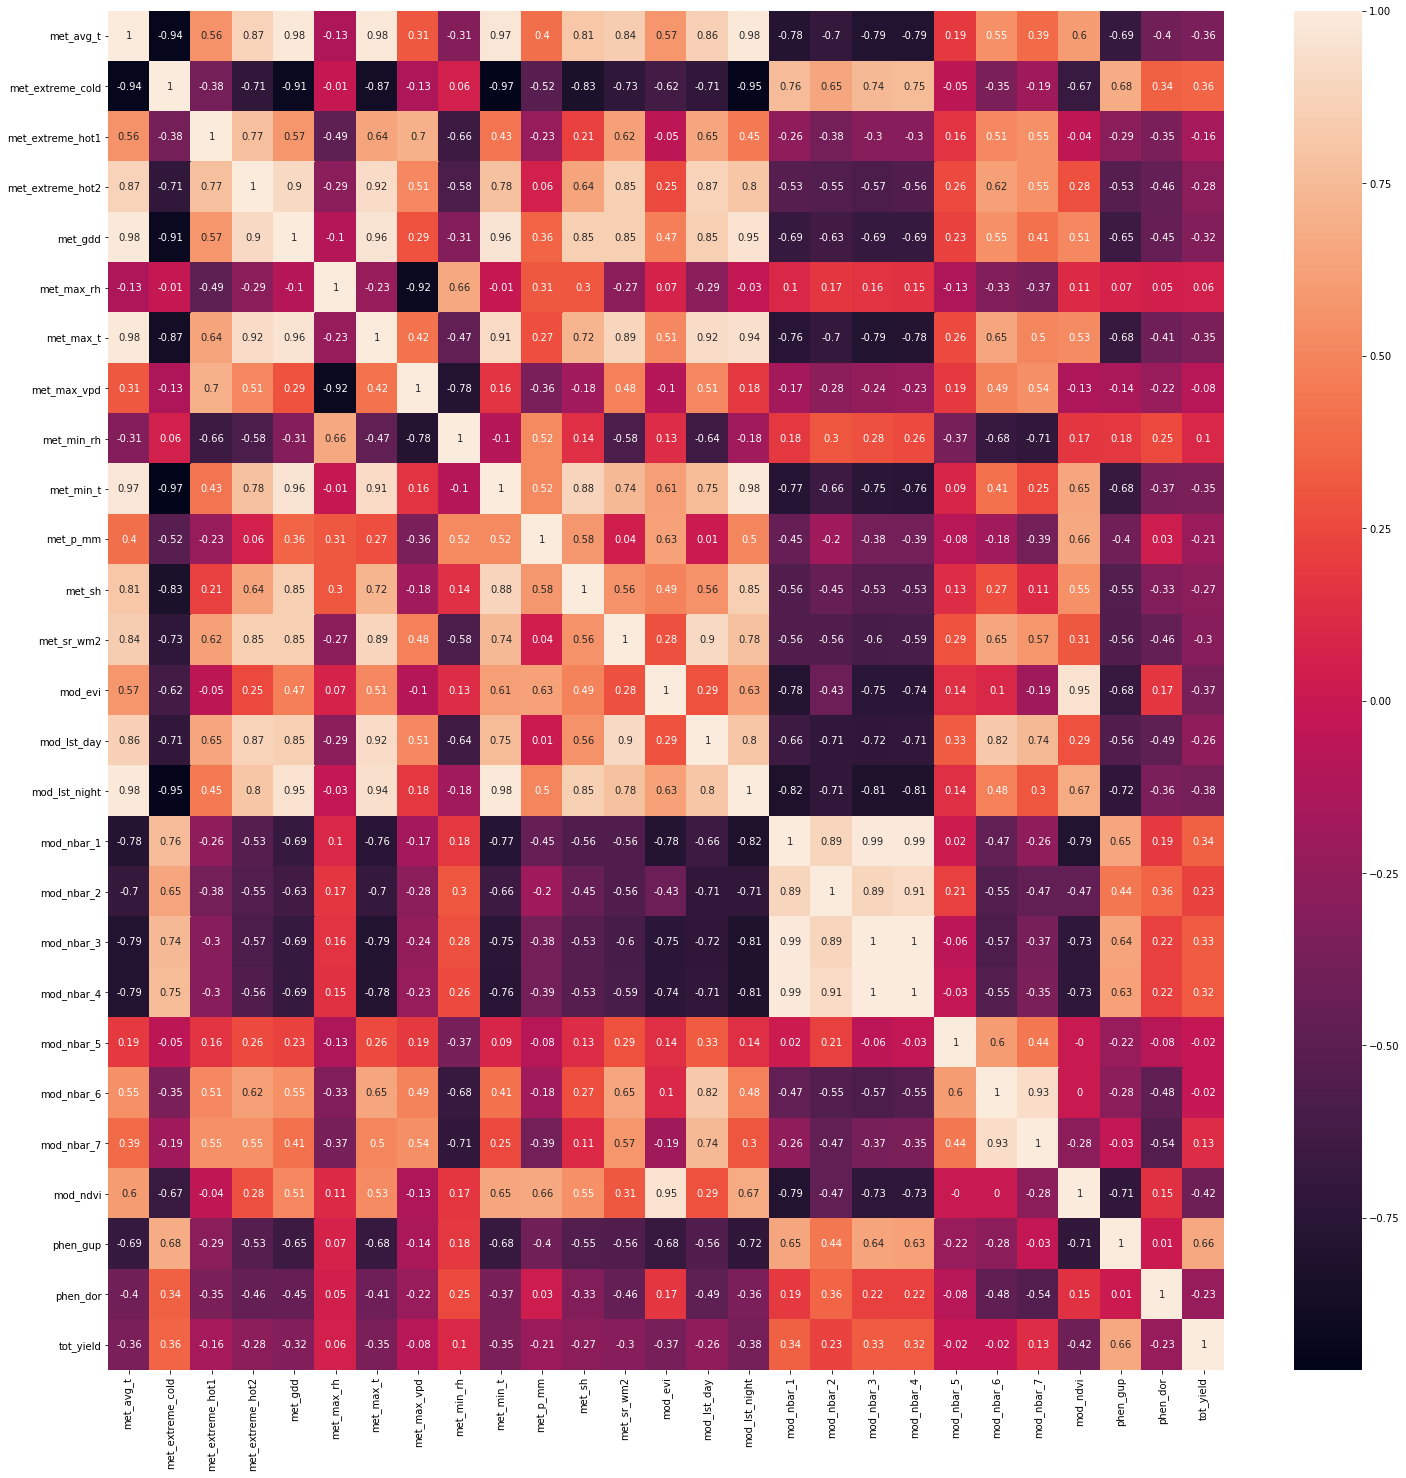

In [20]:
correlation_matrix = corr_df.corr().round(2)
plt.figure(figsize = (25,25))
sns.heatmap(data=correlation_matrix, annot=True)

# scatter plots for features vs dependant variable

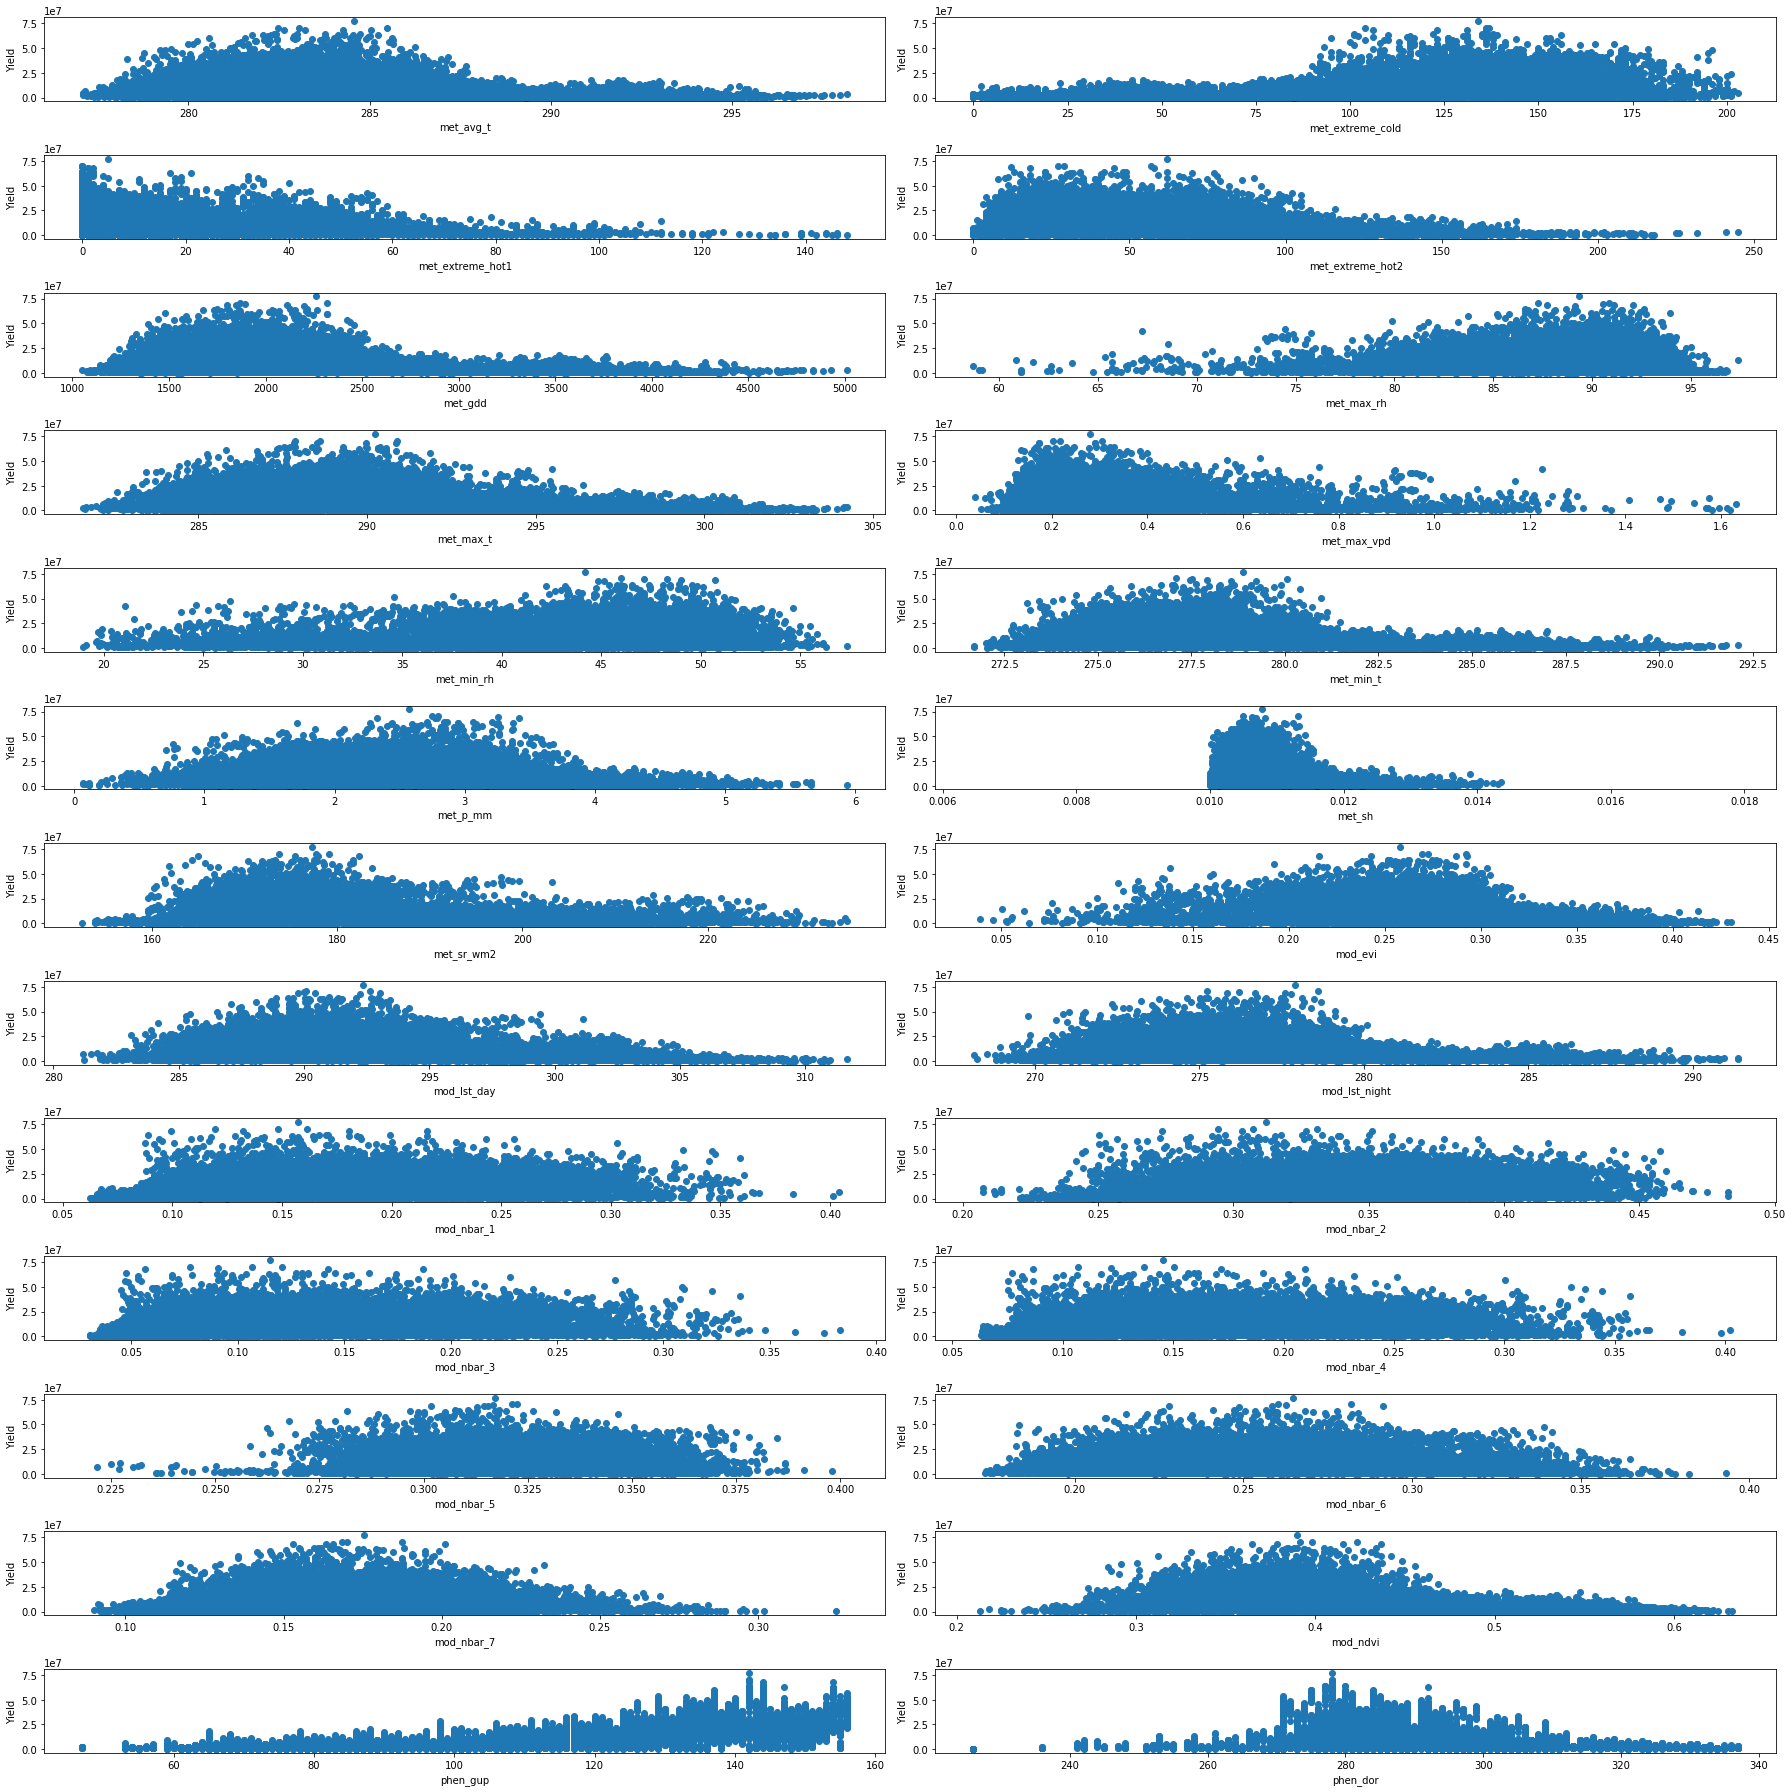

In [21]:
plt.figure(figsize=(25, 25))

features_x = ['met_avg_t', 'met_extreme_cold',
       'met_extreme_hot1', 'met_extreme_hot2', 'met_gdd', 'met_max_rh',
       'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t', 'met_p_mm',
       'met_sh', 'met_sr_wm2', 'mod_evi', 'mod_lst_day', 'mod_lst_night',
       'mod_nbar_1', 'mod_nbar_2', 'mod_nbar_3', 'mod_nbar_4', 'mod_nbar_5',
       'mod_nbar_6', 'mod_nbar_7', 'mod_ndvi',  
       'phen_gup', 'phen_dor']

target_y = train_data['tot_yield']

for i, col in enumerate(features_x):
    plt.subplot(13, 2 , i+1)
    x = train_data[col]
    y = target_y
    plt.scatter(x, y, marker='o')
    #plt.title(col)
    plt.xlabel(col)
    plt.tight_layout()
    plt.ylabel('Yield')

# Feature selection for model training

In [22]:
features = ['met_avg_t', 'met_extreme_cold',
       'met_extreme_hot1', 'met_extreme_hot2', 'met_gdd', 'met_max_rh',
       'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t', 'met_p_mm',
       'met_sh', 'met_sr_wm2', 'mod_evi', 'mod_lst_day', 'mod_lst_night',
       'mod_nbar_1', 'mod_nbar_2', 'mod_nbar_3', 'mod_nbar_4', 'mod_nbar_5',
       'mod_nbar_6', 'mod_nbar_7', 'mod_ndvi',
       'phen_gup', 'phen_dor']

response = ['tot_yield']

In [23]:
X = train_data[features]
x_test = test_data[features]

y = train_data[response]
y_test = test_data[response]



# Preparing Validation data from train dataset

In [24]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Scaling features and response variable for modeling 

In [25]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_val_scaled = sc_X.transform(X_val)


In [26]:
# Response Scaling

from sklearn.preprocessing import MinMaxScaler
sc_Y = MinMaxScaler()
y_train_scaled = sc_Y.fit_transform(y_train)
y_val_scaled = sc_Y.transform(y_val)



# Gradient Boosting Model

In [27]:
from sklearn.metrics import r2_score
from sklearn import metrics
import math
import warnings
warnings.simplefilter("ignore")

from sklearn.ensemble import GradientBoostingRegressor


gbd = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)
model_gb = gbd.fit(X_train_scaled,y_train_scaled)
y_pred_gb = model_gb.predict(X_val_scaled)


r2_gb = r2_score(y_val_scaled,y_pred_gb)
mse_gb = metrics.mean_squared_error(y_val_scaled, y_pred_gb)
rmse_gb = math.sqrt(mse_gb)

print("MSE, Root Mean square error is "+str(mse_gb))
print("RMSE, Root Mean square error is "+str(rmse_gb))
print("R2, Coefficient of Determination is "+str(r2_gb))



MSE, Root Mean square error is 0.005640561123097484
RMSE, Root Mean square error is 0.07510366917200174
R2, Coefficient of Determination is 0.7580613992667216


# plotting the Actual vs Predicted 

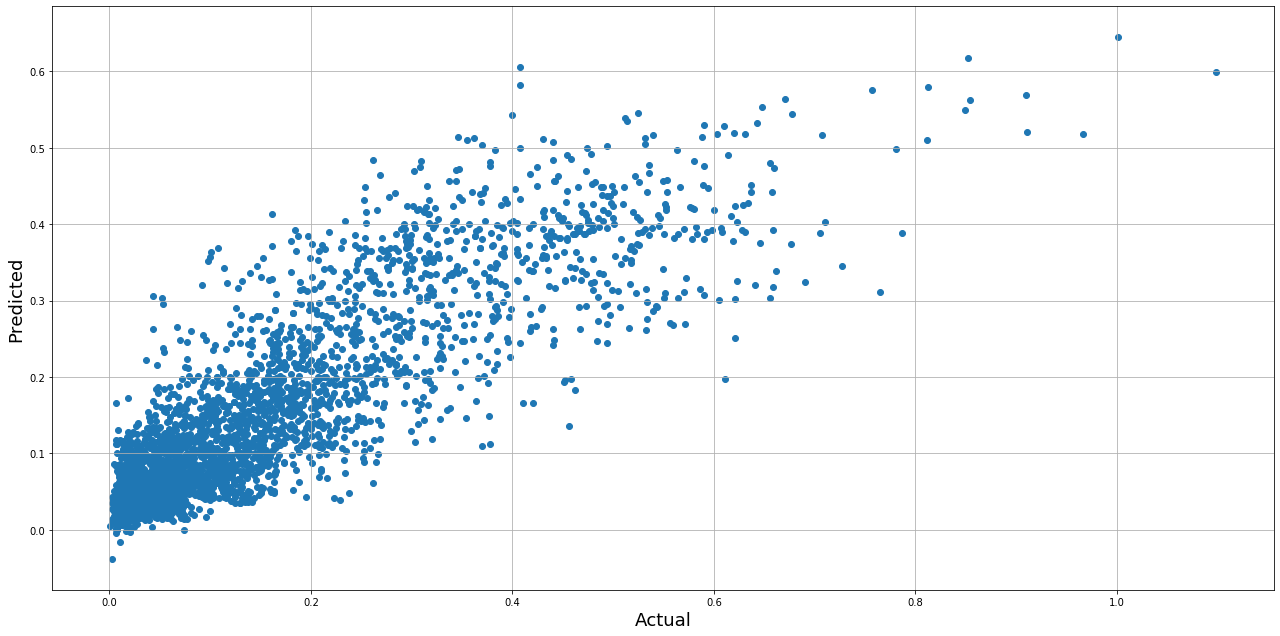

In [49]:
from matplotlib import pyplot

pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('Actual',fontsize=18)
pyplot.ylabel('Predicted',fontsize=18)
pyplot.tight_layout()
pyplot.scatter(y_val_scaled, y_pred_gb)
pyplot.show()

# Random Forest Model

In [29]:
from sklearn.metrics import r2_score
from sklearn import metrics
import math
import warnings
warnings.simplefilter("ignore")

from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
model_rf = rfr.fit(X_train_scaled,y_train_scaled)
y_pred_rf = model_rf.predict(X_val_scaled)


r2_rf = r2_score(y_val_scaled,y_pred_rf)
mse_rf = metrics.mean_squared_error(y_val_scaled, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)

print("MSE, Root Mean square error is "+str(mse_rf))
print("RMSE, Root Mean square error is "+str(rmse_rf))
print("R2, Coefficient of Determination is "+str(r2_rf))



MSE, Root Mean square error is 0.009128136523535437
RMSE, Root Mean square error is 0.0955412817767034
R2, Coefficient of Determination is 0.608470056504992


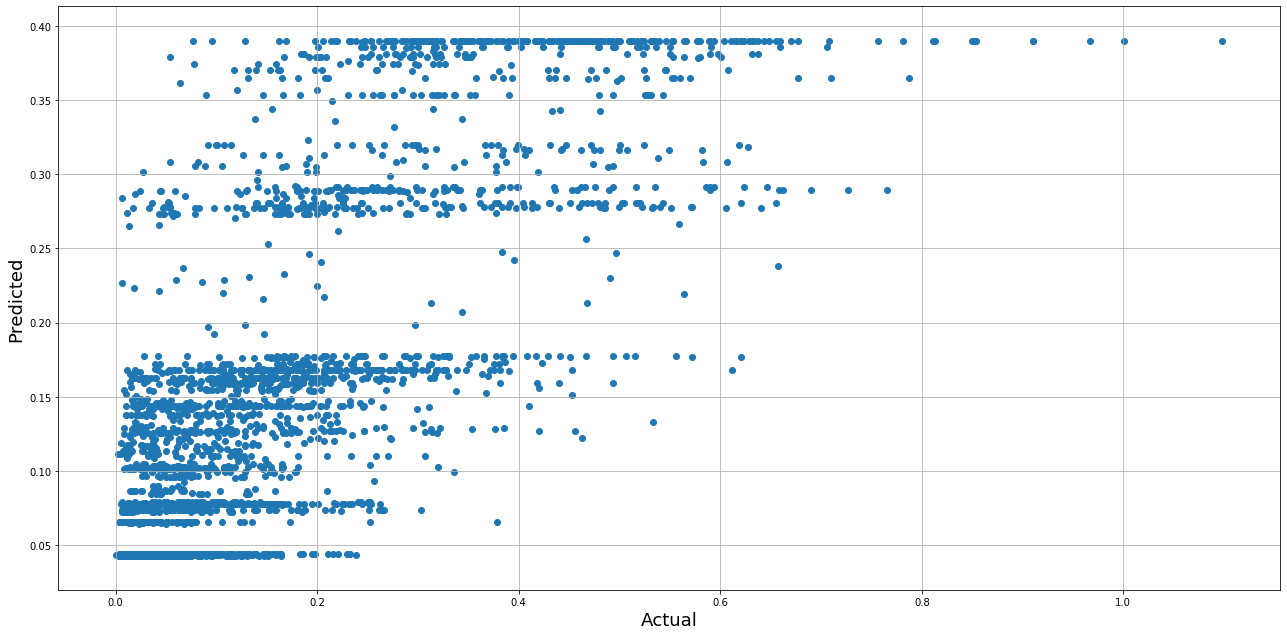

In [50]:
pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('Actual',fontsize=18)
pyplot.ylabel('Predicted',fontsize=18)
pyplot.tight_layout()
pyplot.scatter(y_val_scaled, y_pred_rf)
pyplot.show()

# Support Vector regressor

In [31]:
from sklearn.metrics import r2_score
from sklearn import metrics
import math
import warnings
warnings.simplefilter("ignore")

from sklearn.svm import SVR


svr = SVR(kernel= 'rbf')
model_svr = svr.fit(X_train_scaled,y_train_scaled)
y_pred_svr = model_svr.predict(X_val_scaled)


r2_svr = r2_score(y_val_scaled,y_pred_svr)
mse_svr = metrics.mean_squared_error(y_val_scaled, y_pred_svr)
rmse_svr = math.sqrt(mse_svr)

print("MSE, Root Mean square error is "+str(mse_svr))
print("RMSE, Root Mean square error is "+str(rmse_svr))
print("R2, Coefficient of Determination is "+str(r2_svr))


MSE, Root Mean square error is 0.006109901682601923
RMSE, Root Mean square error is 0.07816586008355517
R2, Coefficient of Determination is 0.7379301400257045


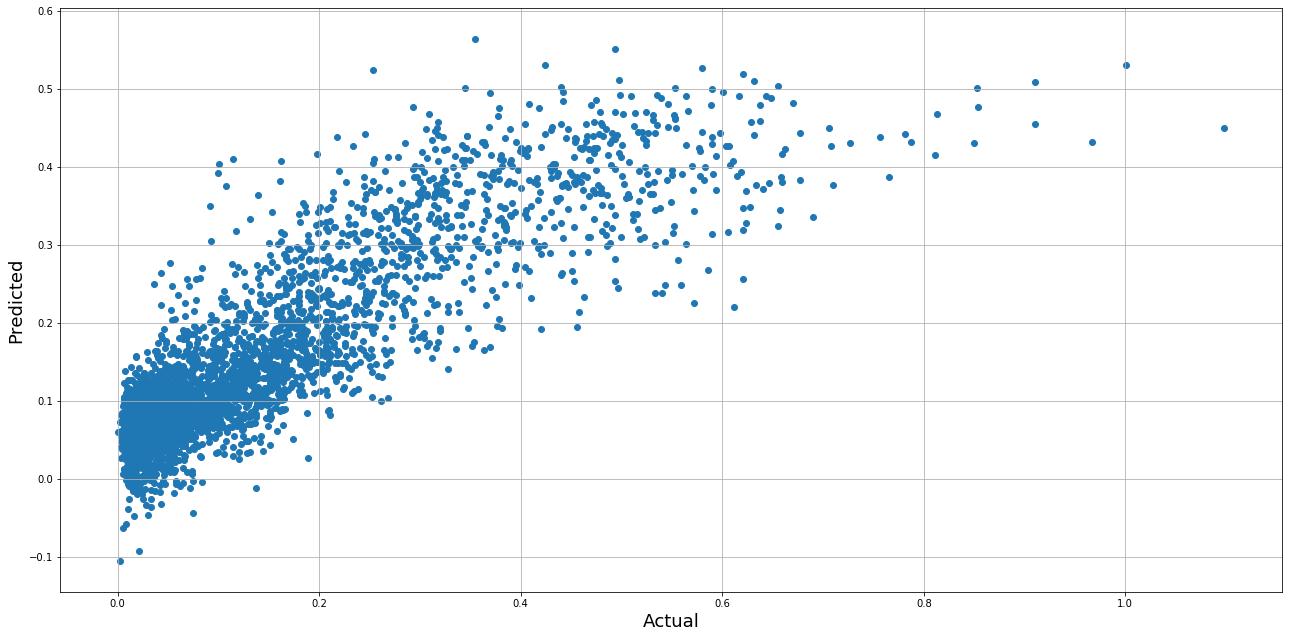

In [51]:
pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('Actual',fontsize=18)
pyplot.ylabel('Predicted',fontsize=18)
pyplot.tight_layout()
pyplot.scatter(y_val_scaled, y_pred_svr)
pyplot.show()

# Decision tree regressor

In [33]:
from sklearn.metrics import r2_score
from sklearn import metrics
import math
import warnings
warnings.simplefilter("ignore")

from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train_scaled,y_train_scaled)
y_pred_dtr = model_dtr.predict(X_val_scaled)


r2_dtr = r2_score(y_val_scaled,y_pred_dtr)
mse_dtr = metrics.mean_squared_error(y_val_scaled, y_pred_dtr)
rmse_dtr = math.sqrt(mse_dtr)

print("MSE, Root Mean square error is "+str(mse_dtr))
print("RMSE, Root Mean square error is "+str(rmse_dtr))
print("R2, Coefficient of Determination is "+str(r2_dtr))


MSE, Root Mean square error is 0.0069498421009966775
RMSE, Root Mean square error is 0.08336571298199684
R2, Coefficient of Determination is 0.7019028716226351


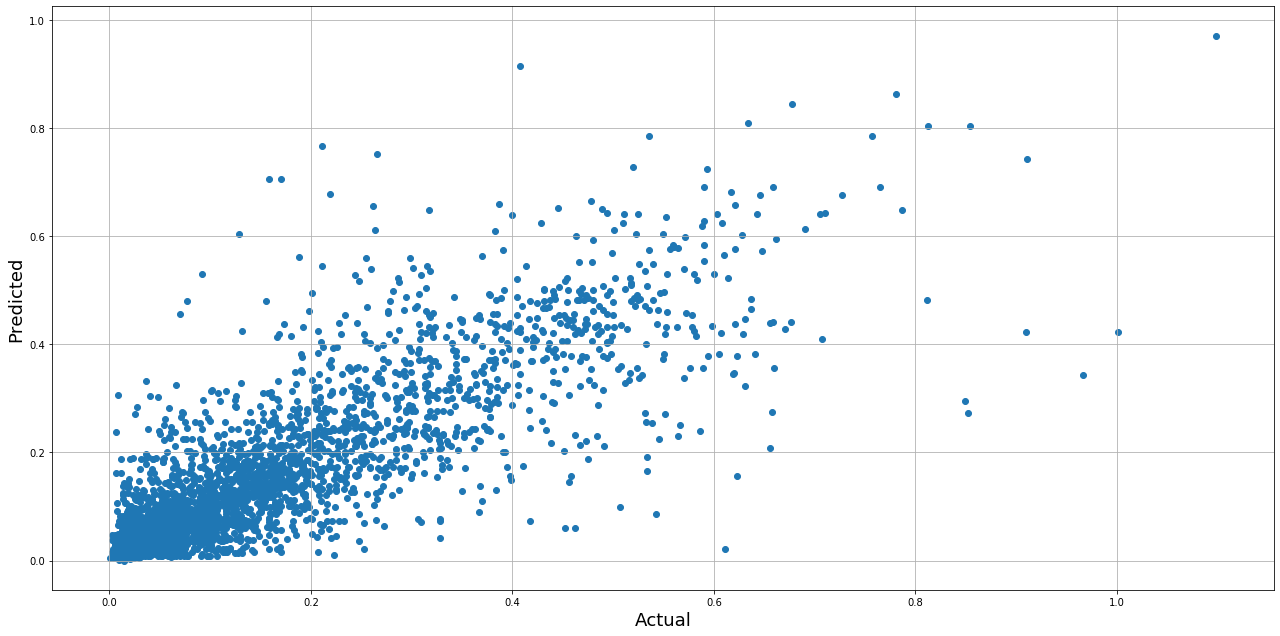

In [52]:
pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('Actual',fontsize=18)
pyplot.ylabel('Predicted',fontsize=18)
pyplot.tight_layout()
pyplot.scatter(y_val_scaled, y_pred_dtr)
pyplot.show()

# Prediction

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()

x_test = test_data[features]
y_test = test_data[response]

X_train_scaled = sc_X.fit_transform(X_train)
x_test_scaled = sc_X.transform(x_test)

sc_Y = MinMaxScaler()
y_train_scaled = sc_Y.fit_transform(y_train)



In [36]:
test_data.head(5)

,adm2_code,year,met_avg_t,met_extreme_cold,met_extreme_hot1,met_extreme_hot2,met_gdd,met_max_rh,met_max_t,met_max_vpd,...,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi,adm1_code,yield,area_harvested_obs,phen_gup,phen_dor,tot_yield
0,US01031,2018,292.074318,23,15,101,3600.356162,93.197911,298.240500,0.186250,...,0.348599,0.273898,0.155609,0.576726,US01,NaN,NaN,72,295,NaN
1,US01033,2018,289.723811,55,5,96,3062.760258,89.895382,295.539573,0.261688,...,0.337210,0.283479,0.165634,0.521074,US01,NaN,NaN,84,281,NaN
2,US01049,2018,288.728871,65,0,59,2826.789672,93.649018,294.318480,0.129740,...,0.346739,0.262223,0.136054,0.617837,US01,NaN,NaN,73,299,NaN
3,US01071,2018,288.825399,65,0,76,2870.229920,93.719454,294.630675,0.136445,...,0.328266,0.249241,0.130008,0.605201,US01,NaN,NaN,77,292,NaN
4,US01077,2018,289.448243,60,5,98,3005.175238,90.937651,295.443223,0.231314,...,0.354312,0.288509,0.161967,0.546959,US01,NaN,NaN,78,284,NaN


# Predictions with Gradient Boost Model

In [37]:

for i in range(len(test_data)):
    test_data_features = pd.DataFrame(data = test_data.loc[i,features]).swapaxes("index", "columns")
    y_pred_scaled = model_gb.predict(sc_X.transform(test_data_features))
    y_pred = sc_Y.inverse_transform([y_pred_scaled])
    test_data.loc[i, 'tot_yield'] = y_pred[0,0]
    
test_data.to_csv("/Users/harish/Desktop/DS_codes/indigo/results_gb.csv")

# Predictions with Random Forest Model

In [38]:

for i in range(len(test_data)):
    test_data_features = pd.DataFrame(data = test_data.loc[i,features]).swapaxes("index", "columns")
    y_pred_scaled = model_rf.predict(sc_X.transform(test_data_features))
    y_pred = sc_Y.inverse_transform([y_pred_scaled])
    test_data.loc[i, 'tot_yield'] = y_pred[0,0]
    
    
test_data.to_csv("/Users/harish/Desktop/DS_codes/indigo/results_rf.csv")

# Predictions with Support Vector regressor

In [39]:

for i in range(len(test_data)):
    test_data_features = pd.DataFrame(data = test_data.loc[i,features]).swapaxes("index", "columns")
    y_pred_scaled = model_svr.predict(sc_X.transform(test_data_features))
    y_pred = sc_Y.inverse_transform([y_pred_scaled])
    test_data.loc[i, 'tot_yield'] = y_pred[0,0]
    
    
test_data.to_csv("/Users/harish/Desktop/DS_codes/indigo/results_svr.csv")

# Predictions with Descision tree regressor

In [40]:

for i in range(len(test_data)):
    test_data_features = pd.DataFrame(data = test_data.loc[i,features]).swapaxes("index", "columns")
    y_pred_scaled = model_dtr.predict(sc_X.transform(test_data_features))
    y_pred = sc_Y.inverse_transform([y_pred_scaled])
    test_data.loc[i, 'tot_yield'] = y_pred[0,0]
    
    
test_data.to_csv("/Users/harish/Desktop/DS_codes/indigo/results_dtr.csv")

# Predicting US annual yield for 2018

In [41]:
df_ay.head()

,year,yield
0,1990,118.5
1,1991,108.6
2,1992,131.5
3,1993,100.7
4,1994,138.6


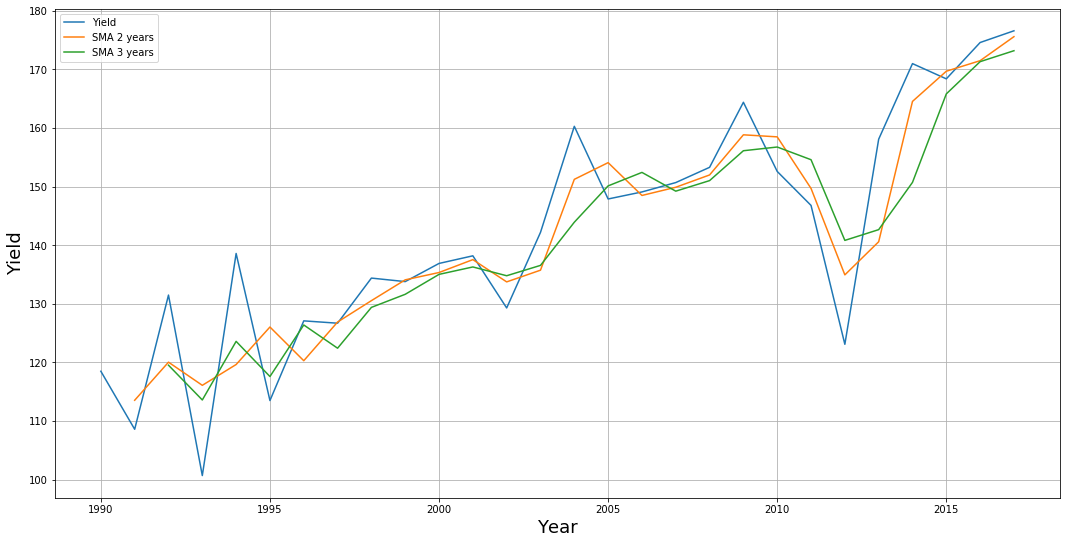

In [42]:
df_ay['sma_2'] = df_ay.iloc[:,1].rolling(window=2).mean()
df_ay['sma_3'] = df_ay.iloc[:,1].rolling(window=3).mean()

from matplotlib import pyplot

pyplot.figure(figsize = (18,9))
pyplot.grid(True)
pyplot.xlabel('Year',fontsize=18)
pyplot.ylabel('Yield',fontsize=18)
pyplot.plot(df_ay['year'], df_ay['yield'],label='Yield')
pyplot.plot(df_ay['year'], df_ay['sma_2'],label='SMA 2 years')
pyplot.plot(df_ay['year'], df_ay['sma_3'],label='SMA 3 years')
pyplot.legend(loc=2)
pyplot.show()


# Assuming that Annual yield is in billion - bushels which constitues corn yield as a portion

In [43]:
df_cd.head(5)

,adm2_code,adm1_code,year,yield,area_harvested_obs,phen_gup,phen_dor,tot_yield
0,US01031,US01,2003,123.0,5500.0,72,295,676500.0
1,US01031,US01,2004,111.0,6900.0,72,295,765900.0
2,US01031,US01,2005,127.0,6000.0,72,295,762000.0
3,US01031,US01,2006,85.0,5600.0,72,295,476000.0
4,US01031,US01,2007,73.0,8300.0,72,295,605900.0


In [44]:
df_cd_agg = df_cd.groupby('year', as_index = False).agg({'tot_yield': 'sum'})
df_cd_agg['corn_yield'] = df_cd_agg['tot_yield']/1000000000
df_annual_yield = pd.merge(df_cd_agg, df_ay, on = ['year'])
df_annual_yield['corn_percentage'] = (df_annual_yield['corn_yield']/df_annual_yield['yield'])*100

In [45]:
df_annual_yield.tail(5)

,year,tot_yield,corn_yield,yield,sma_2,sma_3,corn_percentage
10,2013,1.272605e+10,12.726051,158.1,140.60,142.666667,8.049368
11,2014,1.312776e+10,13.127763,171.0,164.55,150.733333,7.677054
12,2015,1.226925e+10,12.269246,168.4,169.70,165.833333,7.285776
13,2016,1.381617e+10,13.816172,174.6,171.50,171.333333,7.913042
14,2017,1.340889e+10,13.408887,176.6,175.60,173.200000,7.592802


In [46]:
df_annual_yield['corn_percentage'].mean()

7.649825791378821

# Insight : on an average, the corn yield is 7.7% of annual  yield

In [54]:
us_corn_2018 = us_corn.groupby('year', as_index = False).agg({'tot_yield': 'sum'})
us_corn_2018

,year,tot_yield
0,2018,1.322224e+10


In [47]:
us_corn = pd.read_csv("/Users/harish/Desktop/DS_codes/indigo/results_dtr.csv")
us_corn_2018 = us_corn.groupby('year', as_index = False).agg({'tot_yield': 'sum'})
us_corn_2018['corn_yield'] = us_corn_2018['tot_yield']/1000000000
us_yield_2018 = (us_corn_2018['corn_yield']*100)/7.7
print("Predicted 2018 annual yeild is: " +str(us_yield_2018.values))

Predicted 2018 annual yeild is: [171.71745906]


# Predicted 2018 annual yield is 172